# Análise de dados: Reclamações de consumidores com empresa de telecomunicações

Neste projeto serão analisados os dados de reclamações de consumidores com uma empresa de telecomunicações no 1º semestre de 2021 são dados (.csv) reais extraídos do site [consumidor.gov.br](https://www.consumidor.gov.br) disponibilizados pelo [Portal de dados do Ministério da Justiça](http://dados.mj.gov.br/).

## Demanda do negócio

- Identificar público com maior insatisfação
- Reduzir o número de reclamações
- Reduzir o tempo para solução do problema
- Obter a melhor nota em atendimento
- Identificar o principal motivo de reclamação
- Identificar o canal de atendimento com maior índice de insatisfação

## Indagações a serem respondidas pela análise exploratória dos dados

1. Qual o número de reclamações por estado?
2. Qual o número de reclamações por sexo?
3. Qual o número de reclamações por faixa etária?
4. Qual a quantidade/percentual das reclamações por sexo/faixa etária?

5. Qual a quantidade/percentual das reclamações por meio utilizado para contratação/aquisição?
6. Qual a quantidade/percentual das reclamações por assunto?
7. Qual a quantidade/percentual das reclamações por assunto/problema?
8. Qual a quantidade/percentual das reclamações por assunto/contratação?

9. Qual a quantidade/percentual de dias entre abertura de reclamações válidas e resposta?
10. Qual a quantidade/percentual de dias entre abertura de reclamações contestadas e resposta?
11. Qual o número/percentual de avaliação do consumidor?
12. Qual a relação entre dias para resposta e avaliação do consumidor?

13. Qual a quantidade/percentual das reclamações resolvidas, não resolvidas, não avaliadas e canceladas/encerradas?
14. Qual o número/percentual de recusa de reclamações avaliadas como procedentes e improcedentes?

## Importação de pacotes

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import glob


## Carregamento dos dados

In [131]:
# Atribuindo ao dataframe os arquivos csv no diretório dados

lista_csv = glob.glob('dados/*.csv')

converte_csv = lambda k: pd.read_csv(k, sep=';')

df = pd.concat(map(converte_csv, lista_csv), ignore_index=True)

## Detalhes do dataframe

In [132]:
df.sample(10)

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Grupo Econômico
37390,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Taubaté,F,entre 21 a 30 anos,2021.0,1.0,19/01/2021,...,Vício de Qualidade,Suspensão ou desligamento indevido do serviço,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,NaN
788198,Secretaria Nacional do Consumidor,Plataforma Web,NE,MA,Buriticupu,F,entre 51 a 60 anos,2021.0,6.0,09/06/2021,...,Vício de Qualidade,Portabilidade não efetivada,Telefone,N,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
346401,Superintendência de Proteção e Defesa do Consu...,Plataforma Web,CO,GO,Goiânia,M,entre 21 a 30 anos,2021.0,2.0,19/02/2021,...,Cobrança / Contestação,"Cálculo de juros, saldo devedor (contestação, ...",Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
284551,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,NE,PB,Campina Grande,M,entre 31 a 40 anos,2021.0,3.0,16/03/2021,...,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,N,Cancelada,NaN,NaN,Procedente,NaN
327950,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Caxias do Sul,M,entre 31 a 40 anos,2021.0,2.0,14/02/2021,...,Contrato / Oferta,Dificuldade para contratar / recusa injustificada,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
314385,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,NE,CE,Fortaleza,F,entre 31 a 40 anos,2021.0,2.0,09/02/2021,...,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
62152,Nucleo de Defesa do Consumidor da Defensoria P...,Plataforma Web,SE,RJ,Magé,F,entre 41 a 50 anos,2020.0,12.0,09/12/2020,...,Vício de Qualidade,Bloqueio / Suspensão indevida do serviço,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,NaN
214119,Programa Estadual de Proteção e Defesa do Cons...,Plataforma Web,SE,MG,Três Pontas,F,entre 31 a 40 anos,2021.0,2.0,03/02/2021,...,Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,S,N,Cancelada,NaN,NaN,Procedente,NaN
610565,Secretaria Nacional do Consumidor,Plataforma Web,S,RS,Caxias do Sul,M,entre 31 a 40 anos,2021.0,5.0,04/05/2021,...,Atendimento / SAC,Dificuldade de contato / demora no atendimento,Loja física,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,Vivo
768884,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,Araçoiaba da Serra,M,entre 51 a 60 anos,2021.0,6.0,23/06/2021,...,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Loja física,S,N,Cancelada,NaN,NaN,Procedente,Bradesco


In [133]:
df.columns

Index(['Gestor', 'Canal de Origem', 'Região', 'UF', 'Cidade', 'Sexo',
       'Faixa Etária', 'Ano Abertura', 'Mês Abertura', 'Data Abertura',
       'Data Resposta', 'Data Análise', 'Data Recusa', 'Data Finalização',
       'Prazo Resposta', 'Prazo Analise Gestor', 'Tempo Resposta',
       'Nome Fantasia', 'Segmento de Mercado', 'Área', 'Assunto',
       'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Análise da Recusa', 'Grupo Econômico'],
      dtype='object')

In [134]:
df.shape

(897662, 31)

## Seleção das linhas e colunas relevantes

In [135]:
# Selecionando a empresa alvo da análise

df = df.loc[df['Nome Fantasia'] == 'Vivo - Telefônica']
df.shape

(58278, 31)

In [136]:
df = df.drop(columns=[
    'Gestor','Região','Cidade','Ano Abertura','Data Análise','Data Recusa',
    'Data Finalização','Prazo Resposta','Tempo Resposta','Grupo Econômico',
    'Prazo Analise Gestor','Nome Fantasia','Segmento de Mercado',
    'Procurou Empresa','Respondida'])
df.shape

(58278, 16)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58278 entries, 30 to 897598
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Canal de Origem         58278 non-null  object 
 1   UF                      58278 non-null  object 
 2   Sexo                    58274 non-null  object 
 3   Faixa Etária            58278 non-null  object 
 4   Mês Abertura            58278 non-null  float64
 5   Data Abertura           58278 non-null  object 
 6   Data Resposta           51396 non-null  object 
 7   Área                    58278 non-null  object 
 8   Assunto                 58278 non-null  object 
 9   Grupo Problema          58278 non-null  object 
 10  Problema                58278 non-null  object 
 11  Como Comprou Contratou  58278 non-null  object 
 12  Situação                58278 non-null  object 
 13  Avaliação Reclamação    51387 non-null  object 
 14  Nota do Consumidor      31028 non-nu

In [138]:
# Será considerado apenas as reclamações abertas entre janeiro e junho
# meses anteriores e posteriores ao período serão excluídos.

print(df['Mês Abertura'].unique())

df_remover = df.loc[
    (df['Mês Abertura'] == 11) | 
    (df['Mês Abertura'] == 12) | 
    (df['Mês Abertura'] == 7)
    ]

df = df.drop(df_remover.index)

print(df['Mês Abertura'].unique())

[ 1. 11. 12.  2.  3.  4.  5.  6.  7.]
[1. 2. 3. 4. 5. 6.]


## Tratando valores nulos

In [139]:
df.isnull().sum()

Canal de Origem               0
UF                            0
Sexo                          4
Faixa Etária                  0
Mês Abertura                  0
Data Abertura                 0
Data Resposta              6015
Área                          0
Assunto                       0
Grupo Problema                0
Problema                      0
Como Comprou Contratou        0
Situação                      0
Avaliação Reclamação       6023
Nota do Consumidor        23484
Análise da Recusa         43220
dtype: int64

In [140]:
# Quando nulo será considerado "O" outros.

print(df['Sexo'].unique())
df['Sexo'].fillna('O', inplace=True)
print(df['Sexo'].unique())
df['Sexo'].isnull().sum()

['M' 'F' 'O' nan]
['M' 'F' 'O']


0

In [141]:
# Quando nulo é referente a reclamações canceladas por serem improcedentes 
# ou encerradas quando não avaliadas em tempo hábil pelo orgão gestor de reclamações.

print(df['Data Resposta'].sample(10))
df['Data Resposta'].isnull().count()

651634    11/05/2021
474469    07/04/2021
393303    18/03/2021
735333    10/06/2021
533694    16/04/2021
618954    13/05/2021
566044           NaN
215942    10/02/2021
624600    19/05/2021
801893    24/06/2021
Name: Data Resposta, dtype: object


50062

In [142]:
# Quando nulo as reclamações foram canceladas por serem improcedentes
# ou encerradas quando não avaliadas em tempo hábil pelo orgão gestor de reclamações.
# Quando nulo será considerado o valor correspondente da coluna 'Situação'.

print(df['Avaliação Reclamação'].unique()) 
df.loc[df['Avaliação Reclamação'].isnull(), 'Avaliação Reclamação'] = df['Situação']
print(df['Avaliação Reclamação'].unique()) 
df['Avaliação Reclamação'].isnull().sum()


['Resolvida' nan 'Não Avaliada' 'Não Resolvida']
['Resolvida' 'Cancelada' 'Não Avaliada' 'Não Resolvida' 'Encerrada']


0

In [143]:
# Quando nulo as reclamações foram canceladas por serem improcedentes
# ou encerradas quando não avaliadas em tempo hábil pelo orgão gestor de reclamações.
# Quando nulo será considerado 0 "zero".

print(df['Nota do Consumidor'].unique())
df['Nota do Consumidor'].fillna(0, inplace=True)
print(df['Nota do Consumidor'].unique())
df['Nota do Consumidor'].isnull().sum()

[ 5. nan  4.  3.  1.  2.]
[5. 0. 4. 3. 1. 2.]


0

In [144]:
# Quando nulo não houve recusa da reclamação pela empresa reclamada.

print(df['Análise da Recusa'].unique())
df['Análise da Recusa'].isnull().sum()

[nan 'Procedente' 'Encerrada' 'Improcedente']


43220

## Tratando os tipos de valores

In [145]:
df.dtypes

Canal de Origem            object
UF                         object
Sexo                       object
Faixa Etária               object
Mês Abertura              float64
Data Abertura              object
Data Resposta              object
Área                       object
Assunto                    object
Grupo Problema             object
Problema                   object
Como Comprou Contratou     object
Situação                   object
Avaliação Reclamação       object
Nota do Consumidor        float64
Análise da Recusa          object
dtype: object

In [146]:
df['Mês Abertura'] = df['Mês Abertura'].astype('int8', errors='ignore')
df['Data Abertura'] = pd.to_datetime(df['Data Abertura'], format='%d/%m/%Y')
df['Data Resposta'] = pd.to_datetime(df['Data Resposta'], format='%d/%m/%Y')
df['Nota do Consumidor'] = df['Nota do Consumidor'].astype('int8', errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50062 entries, 30 to 854051
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Canal de Origem         50062 non-null  object        
 1   UF                      50062 non-null  object        
 2   Sexo                    50062 non-null  object        
 3   Faixa Etária            50062 non-null  object        
 4   Mês Abertura            50062 non-null  int8          
 5   Data Abertura           50062 non-null  datetime64[ns]
 6   Data Resposta           44047 non-null  datetime64[ns]
 7   Área                    50062 non-null  object        
 8   Assunto                 50062 non-null  object        
 9   Grupo Problema          50062 non-null  object        
 10  Problema                50062 non-null  object        
 11  Como Comprou Contratou  50062 non-null  object        
 12  Situação                50062 non-null  obje

In [147]:
df.count()

Canal de Origem           50062
UF                        50062
Sexo                      50062
Faixa Etária              50062
Mês Abertura              50062
Data Abertura             50062
Data Resposta             44047
Área                      50062
Assunto                   50062
Grupo Problema            50062
Problema                  50062
Como Comprou Contratou    50062
Situação                  50062
Avaliação Reclamação      50062
Nota do Consumidor        50062
Análise da Recusa          6842
dtype: int64

## 1. Qual o número de reclamações por estado?

       UF          %
SP  12695  25.358555
RS  10821  21.615197
MG   4871   9.729935
PR   4226   8.441532
RJ   2735   5.463226
ES   2237   4.468459
BA   2030   4.054972
DF   1779   3.553594
SC   1767   3.529623
GO   1480   2.956334
MT    978   1.953578
PE    774   1.546083
CE    617   1.232472
AM    457   0.912868
PB    393   0.785027
MA    388   0.775039
MS    381   0.761056
PA    328   0.655188
SE    266   0.531341
PI    227   0.453438
AC    141   0.281651
AL    116   0.231713
RO     97   0.193760
RN     94   0.187767
TO     91   0.181775
AP     42   0.083896
RR     31   0.061923


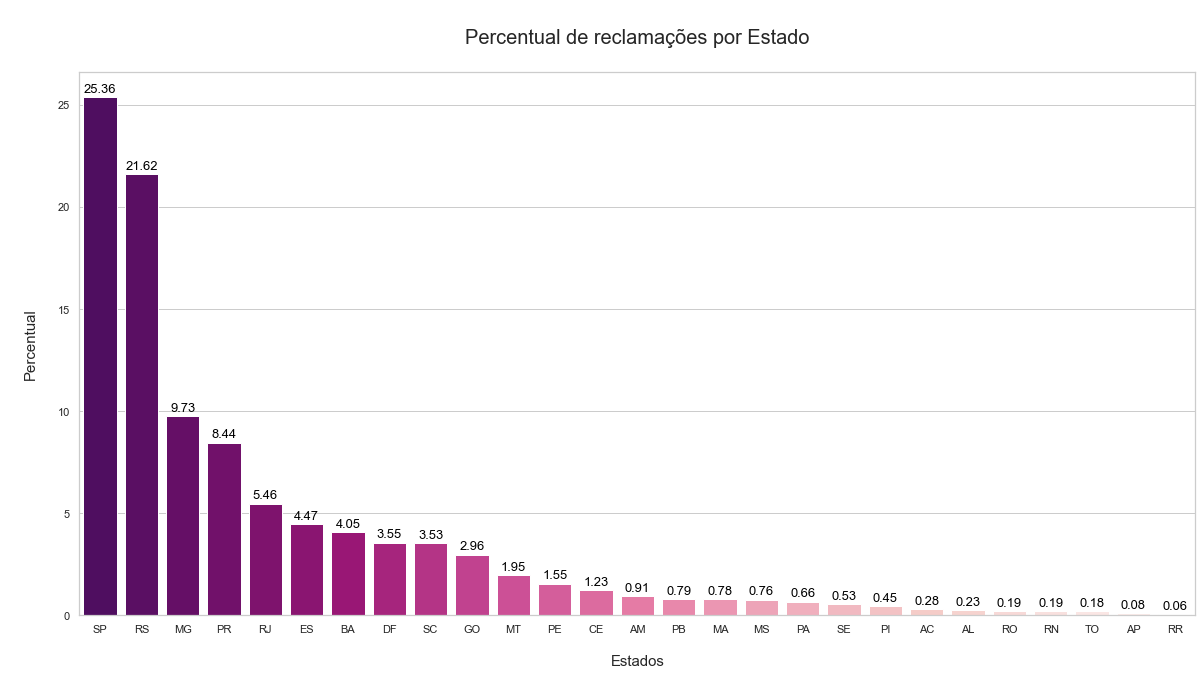

In [148]:
df_uf_valores = df['UF'].value_counts()
df_uf_perc = pd.DataFrame(df_uf_valores)

soma_uf_valores = df_uf_valores.sum()

# calcular porcentagens
df_uf_perc['%'] = df_uf_perc['UF'] / soma_uf_valores * 100

print(df_uf_perc)

plt.figure(figsize = (20, 10))
plot = sns.barplot(x = df_uf_perc.index, y = df_uf_perc['%'], orient = "v", palette = "RdPu_r")
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha = 'center',
                va = 'baseline',
                fontsize = 13,
                color = 'black',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.xlabel('\nEstados', fontsize = 15)
plt.ylabel('\nPercentual\n', fontsize = 15)
plt.title('\nPercentual de reclamações por Estado\n', fontsize = 20)
plt.show(plot)

## 2. Qual o número de reclamações por sexo?

    Sexo          %
M  28178  56.286205
F  21854  43.653869
O     30   0.059926


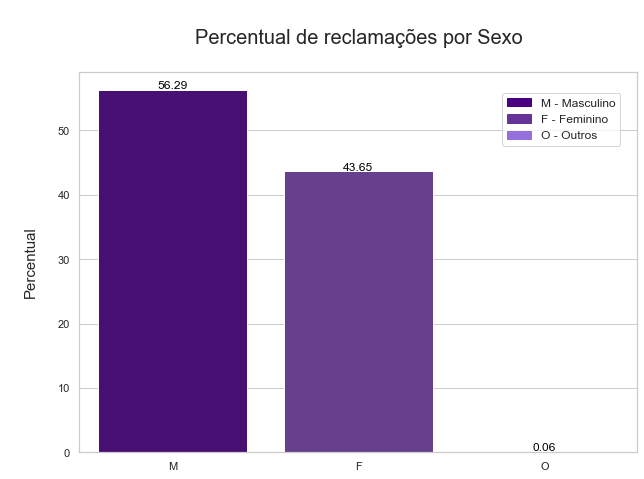

In [149]:
df_sexo_valores = df['Sexo'].value_counts()
df_sexo_perc = pd.DataFrame(df_sexo_valores)

soma_sexo_valores = df_sexo_valores.sum()

# calcular porcentagens
df_sexo_perc['%'] = df_sexo_perc['Sexo'] / soma_sexo_valores * 100

print(df_sexo_perc)

df_sexo_perc['Sexo'] = df_sexo_perc.index

plt.figure(figsize = (10, 7))
plot = sns.barplot(data = df_sexo_perc, 
                    x = 'Sexo', y = '%', 
                    orient = 'v',
                    palette = ['indigo','rebeccapurple','mediumpurple'])
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.2f'),
                (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha = 'center',
                va = 'baseline',
                fontsize = 12,
                color = 'black',
                xytext = (0, 1),
                textcoords = 'offset points')
plt.xlabel('')
plt.ylabel('\nPercentual\n', fontsize = 15)
plt.title('\nPercentual de reclamações por Sexo\n', fontsize = 20)
M = mp.Patch(color = 'indigo', label = "M - Masculino")
F = mp.Patch(color = 'rebeccapurple', label = "F - Feminino")
O = mp.Patch(color = 'mediumpurple', label = "O - Outros")
plt.legend(handles = [M,F,O], loc = 'upper right', bbox_to_anchor = (0.98, 0.96), fontsize = 12)
plt.show(plot)


## 3. Qual o número de reclamações por faixa etária?